# LeNet
컴퓨터 성능이 좋아지며 발전해온 여러 CNN의 Architecture에 대해 실습해보겠습니다.

LeNet은 최초의 CNN 모델로 Yann LeCun에 의해 1998년에 나온 모델입니다.

LeNet은 머신 러닝에서 사용하던 단순한 Fully Connected Layer(MLP)의 한계를 극복하고자 Convoultion 연산을 처음 도입한 인공신경망입니다.

## 지시사항
아래의 내용을 참고하여 LeNet 구조를 완성하세요.

**레이어	      매개변수** 

**컨벌루션
(Conv2D)**	    fileters: 6
                kernel_size: 5
                strides: 1
                activation: tf.nn.relu
                input_shape: 32* 32 1채널

**서브 샘플링
(MaxPool2D)**	    pool_size: 2
                strides: 2
                
**Flatten** 없음

**컨벌루션
(Conv2D)**	    fileters: 16
                kernel_size: 5
                strides: 1
                activation: tf.nn.relu
                input_shape: 16* 16 1채널

**서브 샘플링
(MaxPool2D)**	    pool_size: 2
                strides: 2
                Flatten	없음
                Dense	units: 120
                activation: tf.nn.relu
                Dense	units: 84
                activation: tf.nn.relu
                Dense	units: 10
                activation: tf.nn.softmax
                
## Tips!
- LeNet 구조
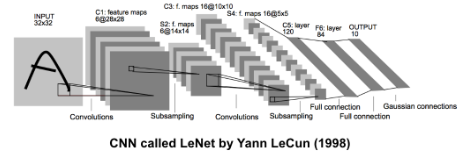
LeNet은 우편번호와 수표의 필기체를 인식하기위해 개발되었으며 총 7개의 Layer로 구성되어 있습니다.
    
    - Convolution Layer : 2개
    - Sub-Sampling Layer : 2개
    - Fully Connected Layer : 2개
    - Output Layer : 10개의 Class 구분
    
- 파라미터 개수
61006개

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Input
from elice_utils import EliceUtils
elice_utils = EliceUtils()

# LeNet Model
def LeNet():
    model = keras.Sequential()
    
    '''
    지시사항 1번
    LeNet 구조를 완성하세요.
    '''
    # Conv 1 Layer
    #model. add(Conv2D(activation='relu'))
    #model. add(Conv2D(activation=tf.nn.relu)) 위 보다이렇게 쓰는게 더 정확하다!
    model.add(Input(shape= (32,32,1))
    model.add(Conv2D(filters=6, kernel_size=5, strides=1, activation=tf.nn.relu))
    # Sub Sampling Layer (Max Pooling)
   # model.add(MaxPool2D((2,2), strides=(2,2)))
    model.add(MaxPool2D((2,2)))
    # Conv 1 Layer
    model.add(Conv2D(filters=16, kernel_size=5, strides=1, activation=tf.nn.relu))
    
    # Sub Sampling Layer (Max Pooling)
    model.add(MaxPool2D((2,2)))
    
    # Fully Connected (FC) Layer와 연결하기 위한 Flatten
    model.add(Flatten())
    
    # FC1 Layer 
    model.add(Dense(120, activation=tf.nn.relu))
    
    # FC2 Layer
    model.add(Dense(84, activation=tf.nn.relu))
    
    # Output Softmax
    model.add(Dense(10, activation=tf.nn.softmax))
    
    return model
    
lenet = LeNet()
lenet.summary()


# VGG Net
VGGNet은 ILSVRC 2014년도에 2위를 한 모델로 모델의 깊이에 따른 변화를 비교할 수 있게 만든 모델입니다.

VGGNet의 특징은 모든 Convolution Layer에 3 x 3 convolution filter를 사용한 것이 특징입니다.

이전까지의 모델들은 첫 번째 Conv Layer에서는 입력 영상의 축소를 위해 11 x 11, 7 x 7의 Conv filter를 사용했습니다.
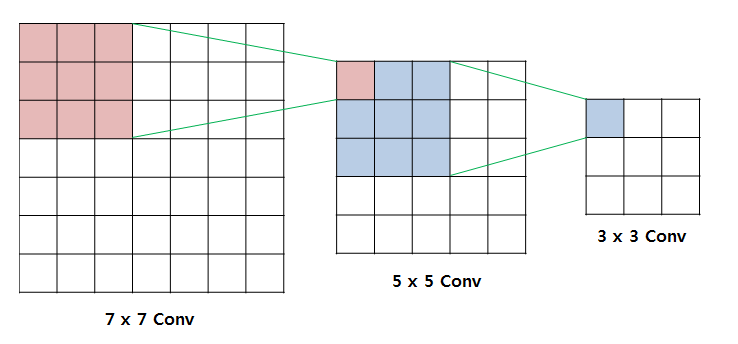
3 x 3 Conv filter를 두번 사용하면 (5 x 5)와 같고 세 번 사용하면 (7 x 7) 과 같아집니다. 그러나 3 x 3을 여러번 사용하게 되면, 연산에 드는 비용이 더 적어지기 때문에 (ex, 3 x 3 x 2 = 18 vs 5 x 5 = 25) 더 높은 성능을 낼 수 있습니다.

## 지시사항
1. 3 x 3 kernel을 사용하여 VGG16()을 완성시켜보세요.
- filters : Output 필터의 개수 [Ex) 64의 배수로 구성해보세요. VGGNet은 최대 512 차원까지 사용합니다.]
- kerner size = 3
- activation function = ReLU
- padding = ‘same’

## Tips!
- **구조** 
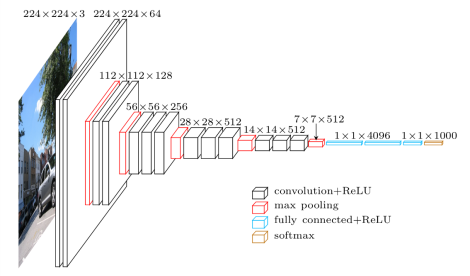

VGGNet은 VGG16, VGG19 2개의 버전이 있습니다.

숫자의 의미는 각각 16개, 19개의 Layer를 갖고 있다는 의미입니다.

VGG16을 예로 들자면 아래와 같이 구성되어 있습니다.

    - Convolution Layer: 13개
    - Fully Connected Layer: 3개
    
- **단점** 

summary()로 VGGNet을 보면 굉장히 많은 파라미터를 볼 수 있습니다. 파라미터가 많기 때문에 Computation Power가 굉장히 많이 필요하고 모델이 깊어짐에 따라 Gradient Vanishing의 문제가 발생할 가능성이 크다는 단점이 있습니다.

- 관련 링크
https://arxiv.org/pdf/1409.1556.pdf


In [ ]:
import tensorflow as tf
from tensorflow import keras
from elice_utils import EliceUtils
elice_utils = EliceUtils()

def VGG16():
    # Sequential 모델 선언
    model = keras.Sequential()
    
    '''
    지시사항 1번
    3 x 3 convolution만을 사용하여 VGG16 Net을 완성하세요.
    '''
    # 첫 번째 Conv Block
    # 입력 Shape는 ImageNet 데이터 세트의 크기와 같은 RGB 영상 (224 x 224 x 3)입니다.
    model.add(keras.layers.Conv2D(filters = 64, kernel_size = 3, activation= 'relu', padding= 'same', input_shape = (224, 224, 3)))
    model.add(keras.layers.Conv2D(filters = 64, kernel_size = 3, activation= 'relu', padding= 'same'))
    model.add(keras.layers.MaxPooling2D(pool_size = 2, strides = 2))
    
    # 두 번째 Conv Block
    model.add(keras.layers.Conv2D(filters = 128, kernel_size = 3, activation= 'relu', padding= 'same'))
    model.add(keras.layers.Conv2D(filters = 128, kernel_size = 3, activation= 'relu', padding= 'same'))
    model.add(keras.layers.MaxPooling2D(pool_size = 2, strides = 2))
    
    # 세 번째 Conv Block
    model.add(keras.layers.Conv2D(filters = 256, kernel_size = 3, activation= 'relu', padding= 'same'))
    model.add(keras.layers.Conv2D(filters = 256, kernel_size = 3, activation= 'relu', padding= 'same'))
    model.add(keras.layers.Conv2D(filters = 256, kernel_size = 3, activation= 'relu', padding= 'same'))
    model.add(keras.layers.MaxPooling2D(pool_size = 2, strides = 2))
    
    # 네 번째 Conv Block
    model.add(keras.layers.Conv2D(filters = 512, kernel_size = 3, activation= 'relu', padding= 'same'))
    model.add(keras.layers.Conv2D(filters = 512, kernel_size = 3, activation= 'relu', padding= 'same'))
    model.add(keras.layers.Conv2D(filters = 512, kernel_size = 3, activation= 'relu', padding= 'same'))
    model.add(keras.layers.MaxPooling2D(pool_size = 2, strides = 2))
    
    # 다섯 번째 Conv Block
    model.add(keras.layers.Conv2D(filters = 512, kernel_size = 3, activation= 'relu', padding= 'same'))
    model.add(keras.layers.Conv2D(filters = 512, kernel_size = 3, activation= 'relu', padding= 'same'))
    model.add(keras.layers.Conv2D(filters = 512, kernel_size = 3, activation= 'relu', padding= 'same'))
    model.add(keras.layers.MaxPooling2D(pool_size = 2, strides = 2))
    
    # Fully Connected Layer
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(4096, activation= tf.nn.relu))
    model.add(keras.layers.Dense(4096, activation= tf.nn.relu))
    model.add(keras.layers.Dense(1000, activation= tf.nn.softmax))
    
    return model

vgg16 = VGG16()
vgg16.summary()

# ResNet
ResNet은 ILSVRC 2015에서 우승한 모델로 Top -5 Error가 3.6% 밖에 안되는 굉장히 고성능의 모델입니다.

ResNet은 굉장히 깊은 층(최대 152-Layer)까지 쌓을 수 있는 모델입니다.
모델의 층이 깊어질수록 역전파 (Backpropagation) 시 기울기가 0으로 수렴해버려 학습이 진행되지 않는 Gradient Vanishing 현상이 발생합니다. 이러한 현상을 **Degradation Problem** 이라고 합니다.

ResNet은 Degradation problem을 완화하고 깊은 Layer를 가진 모델을 만들기 위해 Skip Connection이란 Residual Learning을 도입하였습니다.

## 지시사항
1. identity_block()을 완성해보세요.
2. residual_block()을 완성해보세요.

## Tips!

- **Top-5 Error** 란 모델이 예측한 최상위 5개 Class 가운데 정답이 없는 경우의 오류율을 말합니다.
- Residual Learning 기존 딥러닝 모델을 H(x) 라고 할 때, 우리는
$H(x) - y$
를 최소화하고 H(x)를 얻기 위해 학습을 했습니다.

그러나 ResNet은 입력 (x)와 출력 H(x)의 잔차 F(x) (Residual)를 $H(x) - x$ 라 가정하고
$F(x) = H(x) - x$

를 찾도록 학습이 됩니다.

결과적으로 출력은
$H(x) = F(x) + x$
의 형태가 됩니다. 이렇게 잔차 (Residual)를 학습하는 것을 Residual Learning 이라고 합니다.

그리고 모델의 입력 (x)과 잔차 (F(x))가 더해진 것을 다음 Layer의 입력으로 사용하는 것을 **Skip Connection** 이라 합니다.

- Skip Connection

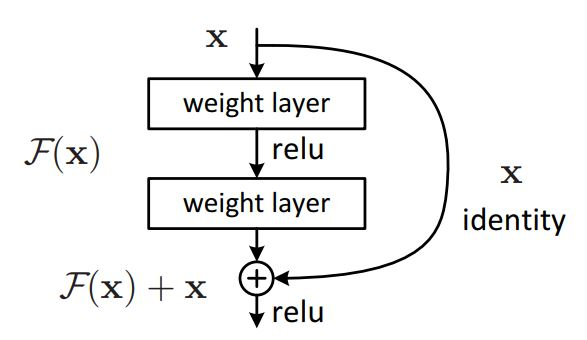

Skip Connection을 적용한 Residual block의 모습입니다. 이렇게 입력을 출력에 더하여 다음 Layer의 입력으로 사용하게 되면 역전파시 미분 값이 적어도 1이상의 값이 나와 기울기가 0으로 수렴하는 현상을 최소화했습니다.

- 구조
    - ResNet에서는 두 종류의 Residual block을 사용합니다. Residual block을 쌓아 굉장히 깊은 층의 모델을 만들어냅니다.

    - Residual block : Feature map의 크기를 절반으로 줄이는 대신 Feature map의 Dimension을 2배로 늘리는 block입니다. Dimension을 맞추기 위해 1 x 1 Convolution을 사용한 block입니다. 이를 Projection Shortcut Connection 이라 합니다.

    - Identity block : 입력과 출력의 Dimension이 같은 경우에 사용합니다.

전체적인 구조 및 자세한 사항은 아래의 링크에서 확인해보세요.

- 관련 링크
https://www.cv-foundation.org/openaccess/content_cvpr_2016/papers/He_Deep_Residual_Learning_CVPR_2016_paper.pdf

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import add, Input,Dense,Activation, Flatten, Conv2D, MaxPooling2D, GlobalMaxPooling2D, ZeroPadding2D, AveragePooling2D, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.models import Model


# 입력과 출력의 Dimension이 같은 경우 사용합니다.
def identity_block(input_tensor, kernel_size, filters):
    
    filters1, filters2, filters3 = filters
    
    x = Conv2D(filters1, (1, 1))(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(filters2, kernel_size, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(filters3, (1, 1))(x)
    x = BatchNormalization()(x)
    
    '''
    지시사항 1번
    아래 내용을 채워 identity_block()을 완성하세요.
    '''
    # 입력(x) : input_tensor와 F(x) : x를 더해줍니다.
    # TODO : add()와 Activation() 메서드를 사용해서 relu(F(x) + x) 의 형태로 만들어보세요. 
    x = add([x,input_tensor])
    x = Activation('relu')(x)
    return x


def residual_block(input_tensor, kernel_size, filters, strides=(2, 2)):
    filters1 , filters2 , filters3 = filters
    
    # 입력 Feature Map의 Size를 1/2로 줄이는 대신 Feature map의 Dimension을 2배로 늘려줍니다.
    x = Conv2D(filters1, (1, 1), strides=strides)(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(filters2, kernel_size, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(filters3, (1, 1))(x)
    x = BatchNormalization()(x)
    
    #F(x)
    '''
    지시사항 2번
    아래 내용을 채워 residual_block()을 완성하세요.
    '''
    # TODO : Projection Shortcut Connection을 구현해보세요.
    # 1 x 1 Convolution 연산을 수행하여 Dimension을 2배로 증가시키고
    # 입력 Feature map의 size를 1/2로 축소시켜보세요.
    print(x)
    print(input_tensor)
    print(filters)
    shortcut = Conv2D(filters3, (1,1), strides=strides)(input_tensor)
    shortcut = BatchNormalization()(shortcut)
    print(shortcut)

    # F(x) : x와 Shortcut Connection : shortcut을 더해줍니다.
    # TODO : add()와 Activation() 메서드를 사용해서 relu(F(x) + shortcut) 의 형태로 만들어보세요.
    x = add([x, shortcut])
    x = Activation('relu')(x)
    return x


def ResNet50():
    # 입력 이미지의 Shape을 정해줍니다.
    shape = (224,224,3)
    inputs = Input(shape)
    
    # 입력 영상의 크기를 줄이기 위한 Conv & Max-pooling
    x = ZeroPadding2D((3, 3))(inputs)
    x = Conv2D(64, (7, 7), strides=(2, 2))(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D((3, 3), strides=(2, 2))(x)
    
    # 첫 번째 Residual Block (입력 영상 Size 2배 축소 / Dimension 2배 증가)
    x = residual_block(x, 3, [64, 64, 256], strides=(1, 1))
    x = identity_block(x, 3, [64, 64, 256])
    x = identity_block(x, 3, [64, 64, 256])
    
    
    # 두 번째 Residual Block (입력 영상 Size 2배 축소 / Dimension 2배 증가)
    x = residual_block(x, 3, [128, 128, 512])
    x = identity_block(x, 3, [128, 128, 512])
    x = identity_block(x, 3, [128, 128, 512])
    x = identity_block(x, 3, [128, 128, 512])
    
    # 세 번째 Residual Block (입력 영상 Size 2배 축소 / Dimension 2배 증가)
    x = residual_block(x, 3, [256, 256, 1024])
    x = identity_block(x, 3, [256, 256, 1024])
    x = identity_block(x, 3, [256, 256, 1024])
    x = identity_block(x, 3, [256, 256, 1024])
    x = identity_block(x, 3, [256, 256, 1024])
    x = identity_block(x, 3, [256, 256, 1024])
    
    # 네 번째 Residual Block (입력 영상 Size 2배 축소 / Dimension 2배 증가)
    x = residual_block(x, 3, [512, 512, 2048])
    x = identity_block(x, 3, [512, 512, 2048])
    x = identity_block(x, 3, [512, 512, 2048])

    # 마지막단에서 FC layer를 쓰지 않고 단순히 Averaging 합니다.
    x = AveragePooling2D((7, 7))(x)
    #x=GlobalAgeragePooling2D()(x)
    x = Flatten()(x)
    # 1000개의 Class 구분
    x = Dense(1000, activation='softmax')(x)
    
    # 모델 구성
    model = Model(inputs, x)
    return model

model = ResNet50()
model.summary()


# Deconvolution
Convolution Layer는 Convolution 연산을 통해 Feature map의 크기를 줄이고 특정 Feature를 추출하는 역할을 담당하고 있습니다.

이와 반대로 Deconvolution은 Feature map의 크기를 증가시키는 방식으로 동작합니다.

## Deconvolution 동작 방식
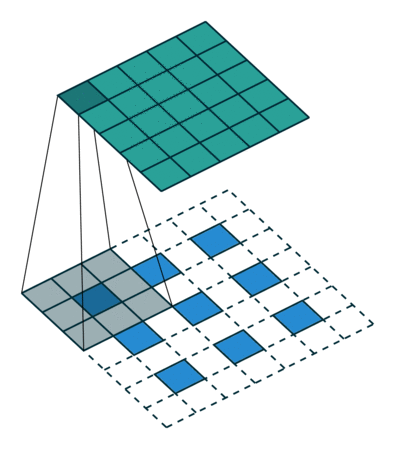

Deconvolution은 픽셀 주위에 Zero padding을 통해 feature map의 크기를 우선 늘려줍니다.

그 후 늘어난 feature map에 Convolution 연산을 해줍니다.

Deconvolution은 CNN의 결과물을 반대로 되돌려 Input과 같은 사이즈를 만들때 사용합니다.
이를 통해 Segmentation이나 CNN Visualization에 사용됩니다.

### Deconvolution을 위한 함수/라이브러리

- tf.keras.layers.Conv2DTranspose()
- filters : Output filter 개수
- kernel_size : Convolution Kernel의 크기
- padding : same or valid
- strides : Kernel이 움직이는 폭

## 지시시항
1. 임의의 Feature map feature_map을 tuple 형태로 선언해주세요.
2. Conv2DTranspose로 Deconvolution layer를 쌓아보세요.
(Conv2DTranspose sample codes)
3. Deconv_model의 결과 Shape이 임의의 이미지 image_size와 같아지도록 모델을 구성해보세요.

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense, Conv2DTranspose, MaxPooling2D, AveragePooling2D, Dropout, Flatten, concatenate
from tensorflow.keras.models import Model
from elice_utils import EliceUtils
elice_utils = EliceUtils()

# 입력 이미지의 Shape입니다.
image_size = (256, 256, 3)
'''
지시사항 1번
임의의 Feature map을 tuple 형태로 선언하세요.
'''
# TODO : 임의의 Feature map (16,16,64)을 만들어줍니다.
feature_map = (16,16,64)

def deconvolution_fun():

    '''
    지시사항 2번
    Conv2DTranspose로 Deconvolution layer를 쌓으세요.
    '''
    
    # Deconvolution Model입니다.
    Deconv_model = keras.Sequential([
        Input(feature_map),
        Conv2DTranspose(filters=32, kernel_size=3, padding='same', strides=2),
        Conv2DTranspose(filters=16, kernel_size=3, padding='same', strides=2),
        Conv2DTranspose(filters=8, kernel_size=3, padding='same', strides=2),
        Conv2DTranspose(filters=3, kernel_size=3, padding='same', strides=2),
        
    
    # TODO : 마지막 Conv2DTranspose를 통해 입력 이미지의 Shape과 같은 (256,256,3)의 Shape을 만들어주세요.
        #pass
    ])
        
    # Deconvolution Model 구조 출력
    Deconv_model.summary()
    return Deconv_model

# image_size와 Deconv_model의 결과 Shape 비교
if image_size == deconvolution_fun().layers[-1].output_shape[1:4]:
    print('Feature Map을 입력 이미지의 Shape과 똑같이 복원해냈습니다.')
else:
    print('입력 이미지의 Shape과 Output Feature map의 Shape이 다릅니다.')



# 영상 분할 (Image Segmentation)
Semantic Segmentation은 컴퓨터 비전 분야에서 많이 연구되어온 분야입니다. 사진에서 물체 (Object)를 찾고 물체와 배경을 분리해내는 작업을 Semantic Segmentation이라고 합니다.

Semantic Segmentation은 Classification, Detection 과도 많은 연관이 있으며, 픽셀 단위의 예측을 수행하여 대상을 분리해냅니다.
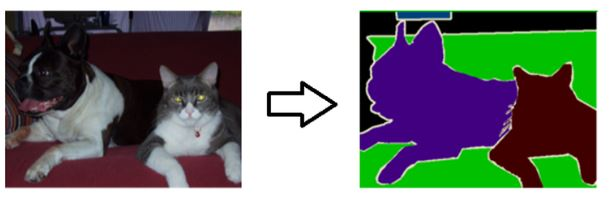
이번 실습에서는 간단하게 Fully Convolution Network로 만든 Segmentation model이 어떻게 구성되어있는지 알아보겠습니다.

### 영상 분할을 위한 함수/라이브러리

- tf.keras.layers.UpSampling2D()
- size : Upsampling을 위한 factor 값
- interpolation : Upsampling 시 늘어난 feature map 안을 채울 방법을 선택합니다. (nearest or bilinear)

## 지시사항
1. Segmentation()의 결과 Shape가 임의의 이미지 image_shape와 같아지도록 모델을 구성하세요.

## Tips!
- **FCN:**  
FCN은 Fully Convolution Network의 약자로 CNN을 기반으로 이루어져 있습니다.
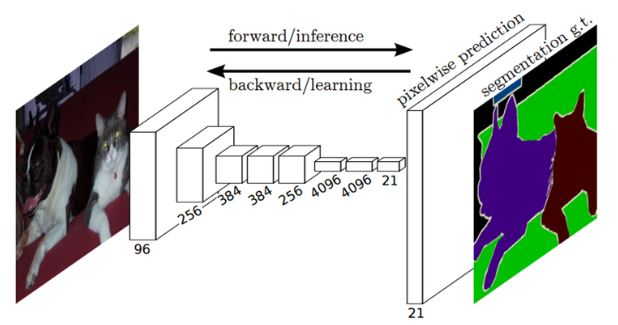

기존의 CNN과 다른점은 모델의 뒤쪽에서 fully connected layer를 사용하지 않고 1 x 1 Convolution layer를 사용하여 Segmentation을 진행합니다.

그리고 모델의 마지막 단에서 Upsampling을 통해 줄어든 Feature map의 크기를 다시 키우는 작업을 수행합니다.

- 관련 링크
https://people.eecs.berkeley.edu/~jonlong/long_shelhamer_fcn.pdf
https://www.tensorflow.org/api_docs/python/tf/keras/layers/UpSampling2D

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense, Conv2D, UpSampling2D, AveragePooling2D, Dropout, Flatten, concatenate, Conv2DTranspose
from tensorflow.keras.models import Model
from elice_utils import EliceUtils
elice_utils = EliceUtils()

# 임의의 이미지 Shape
image_shape = (256,256,3)

# 간단한 Segmetation Model입니다.
def Segmentation():
    shape = (256,256,3)
    inputs = Input(shape)
    
    '''
    지시시항 1번
    Segmentation의 결과 Shape가 임의의 이미지와 같아지도록
    모델을 구성하세요.
    
    '''
    
    # TODO : 4 층의 3 x 3 Convolution Layer를 쌓아보세요. (padding = 'same', strides = 2)
    conv1 = Conv2D(filters=16, kernel_size=3, padding='same', strides=2)(inputs)
    print(conv1)
    conv2 = Conv2D(filters=32, kernel_size=3, padding='same', strides=2)(conv1)
    conv3 = Conv2D(filters=64, kernel_size=3, padding='same', strides=2)(conv2)
    conv4 = Conv2D(filters=128, kernel_size=3, padding='same', strides=2)(conv3)
    print(conv4)
    
    # TODO : 3 층의 1 x 1 Convolution Layer를 쌓아보세요. (padding = 'same', strides = 1)
    conv5 = Conv2D(filters=64, kernel_size=3, padding='same', strides=1)(conv4)
    conv6 = Conv2D(filters=32, kernel_size=3, padding='same', strides=1)(conv5)
    conv7 = Conv2D(filters=3, kernel_size=3, padding='same', strides=1)(conv6)
    print(conv7)
    
    # TODO : Upsampling을 통해 image_shape와 같은 (256,256,3)의 output을 만들어보세요.
    #upsampling = UpSampling2D((16,16))(conv7)
    upsampling = Conv2DTranspose(filters=3, kernel_size=1, padding='same', strides=16)(conv7)
    
    # 쌓은 Layer들을 모델로 만들어줍니다.
    model = Model(inputs = [inputs], outputs = [upsampling])
    
    return model
    
seg_model = Segmentation()
seg_model.summary()

# image_shape와 seg_model의 결과 Shape 비교
if image_shape == seg_model.layers[-1].output_shape[1:4]:
    print('Segmentation을 입력 이미지의 크기와 똑같이 복원해냈습니다.')
else:
    print('입력 이미지의 크기와 Model Output Shape이 다릅니다.')

# Transfer Learning (1)
전이 학습(Transfer Learning)은 기존의 학습된 모델을 사용하여 새로운 모델을 만들 때, 더 빠른 학습과 예측 성능을 높이는 방법입니다.

전이 학습을 사용하는 이유는 아래와 같습니다.

- 기존에 학습이 잘된 모델들이 많음

- 복잡한 모델일수록 새로운 학습에 많은 연산량, 메모리, 시간이 소요됨

- 실질적으로 처음부터 새로운 모델을 학습시키기 어려운 경우 사용

이미 잘 학습된 모델이 있고, 이 모델과 유사한 문제를 풀려할 때 전이 학습을 사용합니다.

## Transfer Learning 구현
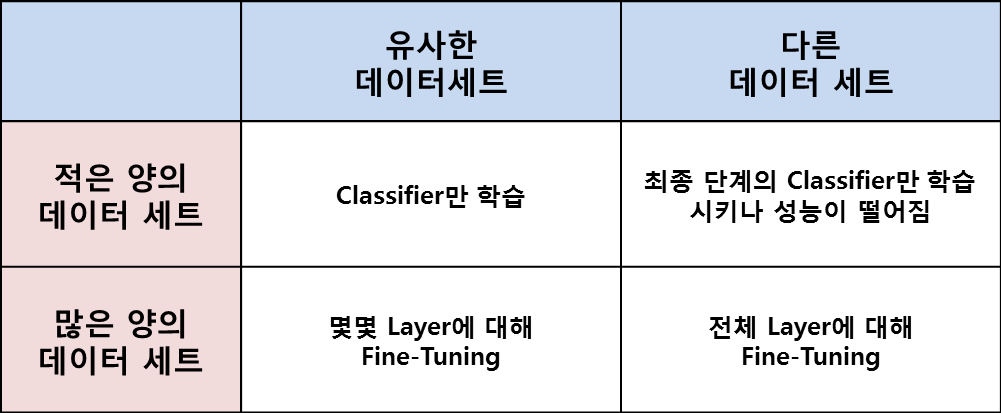

전이 학습을 구현하는데 있어 데이터의 양과 데이터의 유사도에 따른 표입니다.

1. **적은 양의 유사 데이터** 
- 데이터의 양이 적기 때문에 Overfitting을 방지하기 위해 뒤쪽의 Classifier만 학습

3. **적은 양의 다른 데이터**
- 데이터의 양이 적기 때문에 뒤쪽의 Classifier만 학습하지만 성능 향상을 기대하기 힘듬

3. **많은 양의 유사 데이터**
- Overfitting의 위험이 적으므로 전체 및 많은 Layer를 Fine-tuning

4. **많은 양의 다른 데이터**
- 데이터가 다르기 때문에 전체 모델을 Fine-tuning

전이 학습 실습에서 (0 ~ 4)의 MNIST 데이터만 학습시키고 (5 ~ 9)의 MNIST 데이터로 검증을 해보면 당연히 Test accuracy는 굉장히 낮습니다.

(0 ~ 4)의 MNIST 데이터로만 학습된 모델에 전이 학습을 적용시키기 위한 몇가지 작업을 이번 실습에서 진행해보겠습니다.

## 지시사항
1. [0 ~ 4] Label의 데이터로 CNN_model을 학습시켜보세요.

2. [5 ~ 9] Label의 데이터로 CNN_model을 검증해보세요.

3. Visulaize()로 학습이 어떻게 이루어졌는지 확인해보세요.

4. model.pop()로 Classifier 부분을 제거하고 summary()로 잘 제거가 되었는지 확인해보세요.

    - model.pop() 함수는 keras model의 마지막 layer를 제거합니다.
